<h1>Visualisations simples (25%)</h1>

Pour utiliser ce notebook, il est nécessaire d'avoir exécuté les notebooks précédents (Question 1.ipynb, Question 2.ipynb et Question 3.ipynb).

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from scipy import stats
import seaborn as sns
import math
import sys
sys.path.append('../..')
import ift6758
from ift6758.controller.nhl_data_downloader  import NHLDataDownloader, get_dataframe_from_csv_file, get_dataframe_from_concatenated_csv_files


<h3>Question 1.)</h3>

In [2]:
df_2016 = get_dataframe_from_concatenated_csv_files(2016)
df_2016

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,y_coord,event_owner_team_id,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
0,0,2016020473,2016-12-18,1,00:44,53,shot-on-goal,False,wrist,45.0,14.0,9,Senators,away,False,Equal Strength,5v5,1551,8471768,8475234
1,1,2016020473,2016-12-18,1,03:39,61,shot-on-goal,False,wrist,69.0,-23.0,9,Senators,away,False,Equal Strength,5v5,1551,8476879,8475234
2,2,2016020473,2016-12-18,1,03:50,62,shot-on-goal,False,snap,-36.0,19.0,2,Islanders,home,False,Equal Strength,5v5,1551,8474612,8477202
3,3,2016020473,2016-12-18,1,04:38,66,shot-on-goal,False,wrist,74.0,4.0,9,Senators,away,False,Equal Strength,5v5,1551,8474068,8475234
4,4,2016020473,2016-12-18,1,05:02,68,shot-on-goal,False,snap,41.0,-14.0,9,Senators,away,False,Equal Strength,5v5,1551,8473544,8475234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80394,63,2016021041,2017-03-16,3,16:09,676,shot-on-goal,False,backhand,78.0,9.0,29,Blue Jackets,home,False,Equal Strength,5v5,1551,8476981,8473503
80395,64,2016021041,2017-03-16,3,16:10,665,shot-on-goal,False,snap,85.0,-3.0,29,Blue Jackets,home,False,Equal Strength,5v5,1551,8476448,8473503
80396,65,2016021041,2017-03-16,3,19:12,666,shot-on-goal,False,wrist,-80.0,18.0,13,Panthers,away,False,Penalty Kill,5v6,651,8476539,8475683
80397,66,2016021041,2017-03-16,3,19:28,670,shot-on-goal,False,snap,-52.0,32.0,13,Panthers,away,False,Penalty Kill,5v6,651,8476456,8475683


In [3]:
pivot_df_2016 = df_2016.pivot_table(index='shot_type', columns='is_goal', aggfunc='size', fill_value=0)
pivot_df_2016


is_goal,False,True
shot_type,,
Unknown,6,0
backhand,5862,698
deflected,806,199
slap,12691,829
snap,11561,1172
tip-in,3267,713
wrap-around,773,70
wrist,38056,3696


In [4]:
pivot_df_2016.index.name = "type de tir"
pivot_df_2016.columns.name = None
pivot_df_2016

,False,True
type de tir,,
Unknown,6,0
backhand,5862,698
deflected,806,199
slap,12691,829
snap,11561,1172
tip-in,3267,713
wrap-around,773,70
wrist,38056,3696


In [5]:
pivot_df_2016 = pivot_df_2016.rename(columns={False: "nombre de tirs bloqués", True: "nombre de tirs marqués"})
pivot_df_2016

,nombre de tirs bloqués,nombre de tirs marqués
type de tir,,
Unknown,6,0
backhand,5862,698
deflected,806,199
slap,12691,829
snap,11561,1172
tip-in,3267,713
wrap-around,773,70
wrist,38056,3696


In [6]:
pivot_df_2016 = pivot_df_2016.drop(index=["Unknown"])
pivot_df_2016

,nombre de tirs bloqués,nombre de tirs marqués
type de tir,,
backhand,5862,698
deflected,806,199
slap,12691,829
snap,11561,1172
tip-in,3267,713
wrap-around,773,70
wrist,38056,3696


In [7]:
pivot_df_2016["nombre de tirs"] = pivot_df_2016["nombre de tirs bloqués"] + pivot_df_2016["nombre de tirs marqués"]
pivot_df_2016

,nombre de tirs bloqués,nombre de tirs marqués,nombre de tirs
type de tir,,,
backhand,5862,698,6560
deflected,806,199,1005
slap,12691,829,13520
snap,11561,1172,12733
tip-in,3267,713,3980
wrap-around,773,70,843
wrist,38056,3696,41752


In [8]:
pivot_df_2016["pourcentage de tirs marqués"] = pivot_df_2016["nombre de tirs marqués"] / pivot_df_2016["nombre de tirs"] * 100
pivot_df_2016

,nombre de tirs bloqués,nombre de tirs marqués,nombre de tirs,pourcentage de tirs marqués
type de tir,,,,
backhand,5862,698,6560,10.640244
deflected,806,199,1005,19.800995
slap,12691,829,13520,6.131657
snap,11561,1172,12733,9.204429
tip-in,3267,713,3980,17.914573
wrap-around,773,70,843,8.303677
wrist,38056,3696,41752,8.852271


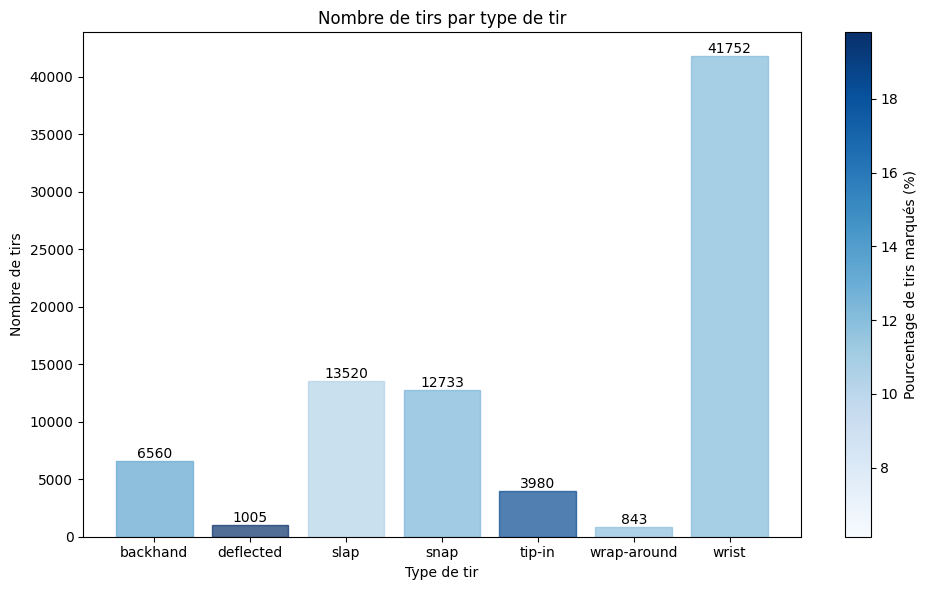

In [9]:
# Créer l'histogramme
plt.figure(figsize=(10, 6))
bars = plt.bar(pivot_df_2016.index, pivot_df_2016["nombre de tirs"], color="blue", alpha=0.7)

# Créer une couleur pour chaque barre en fonction du pourcentage de tirs marqués
colors = plt.cm.Blues(pivot_df_2016["pourcentage de tirs marqués"] / pivot_df_2016["pourcentage de tirs marqués"].max())

# Mettre à jour les barres avec la couleur correspondante
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Créer un ScalarMappable pour la colorbar
norm = plt.Normalize(pivot_df_2016["pourcentage de tirs marqués"].min(), pivot_df_2016["pourcentage de tirs marqués"].max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])  # Pour éviter un avertissement

# Ajouter la colorbar avec l'argument ax
cbar = plt.colorbar(sm, ax=plt.gca(), label="Pourcentage de tirs marqués (%)")

# Ajouter des labels et un titre
plt.xlabel("Type de tir")
plt.ylabel("Nombre de tirs")
plt.title("Nombre de tirs par type de tir")

# Afficher les valeurs au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{yval}", ha="center", va="bottom")

plt.tight_layout()  # Pour un ajustement automatique des éléments
plt.show()

<h3>Questions 1. a) 1. b) et 1. c) </h3>

Il s'agit ici de l'analyse statistique qui nous a permis de savoir où se trouve chaque type d'équipe à chaque période du match.

In [10]:
filtered_df_2016 = df_2016[(df_2016['game_id'] == 2016020922) & (df_2016['period'] == 1) & (df_2016['team_type'] == 'home')]
filtered_df_2016

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,y_coord,event_owner_team_id,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
4525,0,2016020922,2017-02-28,1,01:54,57,shot-on-goal,False,snap,73.0,-23.0,6,Bruins,home,False,Equal Strength,5v5,1551,8474062,8469608
4527,2,2016020922,2017-02-28,1,03:06,61,goal,True,wrist,62.0,5.0,6,Bruins,home,False,Equal Strength,5v5,1551,Unknown,8469608
4528,3,2016020922,2017-02-28,1,05:46,68,shot-on-goal,False,wrist,75.0,3.0,6,Bruins,home,False,Equal Strength,5v5,1551,8468575,8469608
4531,6,2016020922,2017-02-28,1,12:12,78,shot-on-goal,False,wrist,71.0,-17.0,6,Bruins,home,False,Equal Strength,5v5,1551,8478366,8469608
4532,7,2016020922,2017-02-28,1,12:21,80,shot-on-goal,False,backhand,77.0,4.0,6,Bruins,home,False,Equal Strength,5v5,1551,8465009,8469608
4535,10,2016020922,2017-02-28,1,13:51,85,shot-on-goal,False,wrist,48.0,-29.0,6,Bruins,home,False,Equal Strength,5v5,1551,8470638,8469608
4537,12,2016020922,2017-02-28,1,18:31,97,shot-on-goal,False,slap,7.0,35.0,6,Bruins,home,False,Penalty Kill,4v5,1541,8476191,8469608
4538,13,2016020922,2017-02-28,1,18:57,99,shot-on-goal,False,wrist,73.0,17.0,6,Bruins,home,False,Penalty Kill,4v5,1541,8468575,8469608


In [11]:
stat = filtered_df_2016.describe()
stat

,Unnamed: 0,game_id,period,event_id,x_coord,y_coord,event_owner_team_id,situation_code
count,8.000000,8.000000e+00,8.0,8.000000,8.000000,8.000000,8.0,8.0000
mean,6.625000,2.016021e+09,1.0,78.125000,60.750000,-0.625000,6.0,1548.5000
std,4.779047,0.000000e+00,0.0,15.514394,23.680915,21.447194,0.0,4.6291
min,0.000000,2.016021e+09,1.0,57.000000,7.000000,-29.000000,6.0,1541.0000
25%,2.750000,2.016021e+09,1.0,66.250000,58.500000,-18.500000,6.0,1548.5000
50%,6.500000,2.016021e+09,1.0,79.000000,72.000000,3.500000,6.0,1551.0000
75%,10.500000,2.016021e+09,1.0,88.000000,73.500000,8.000000,6.0,1551.0000
max,13.000000,2.016021e+09,1.0,99.000000,77.000000,35.000000,6.0,1551.0000


C'est la fin de la petite analyse statistique, des explications seront apportées dans le blog.

In [12]:
def add_home_team_defending_side(df: pd.DataFrame) -> pd.DataFrame:
	df = df.copy()
	
	df['home_team_defending_side'] = None
	number_of_lines = df.shape[0]
	games_ids = []
	home_team_defending_side_first_period = {}
	home_team_defending_side_second_period = {}

	for index in range(number_of_lines):
		game_id = df.loc[index, 'game_id']
		if game_id in games_ids:
			period = df.loc[index, 'period']
			if period % 2 == 1:
				df.loc[index, 'home_team_defending_side'] = home_team_defending_side_first_period[game_id]
			else:
				df.loc[index, 'home_team_defending_side'] = home_team_defending_side_second_period[game_id]
		else:
			period = df.loc[index, 'period']
			filtered_df = df.query(f"game_id == {game_id} and period == {period} and team_type == 'home'")
			x_coords = filtered_df['x_coord']
			median = x_coords.median()
			if median > 0:
				df.loc[index, 'home_team_defending_side'] = 'left'
				if period % 2 == 1:
					home_team_defending_side_first_period[game_id] = 'left'
					home_team_defending_side_second_period[game_id] = 'right'
				else:
					home_team_defending_side_first_period[game_id] = 'right'
					home_team_defending_side_second_period[game_id] = 'left'
			else:
				df.loc[index, 'home_team_defending_side'] = 'right'
				if period % 2 == 1:
					home_team_defending_side_first_period[game_id] = 'right'
					home_team_defending_side_second_period[game_id] = 'left'
				else:
					home_team_defending_side_first_period[game_id] = 'left'
					home_team_defending_side_second_period[game_id] = 'right'
			games_ids.append(game_id)
			
	return df

In [13]:
def distance_de_tir(tir: pd.Series) -> float:
	shooter_coords = (tir['x_coord'], tir['y_coord'])

	if tir['home_team_defending_side'] == 'left':
		home_goalie_coords = (-100, 0)
		away_goalie_coords = (100, 0)
	else:
		home_goalie_coords = (100, 0)
		away_goalie_coords = (-100, 0)

	if tir['team_type'] == 'home':
		return float(distance.euclidean(shooter_coords, away_goalie_coords))
	else:
		return float(distance.euclidean(shooter_coords, home_goalie_coords))

In [14]:
def add_distance_de_tir(df: pd.DataFrame) -> pd.DataFrame:
	df = df.copy()

	df['distance_de_tir'] = df.apply(distance_de_tir, axis=1)

	return df

In [15]:
def data_processing_pipeline(df: pd.DataFrame) -> pd.DataFrame:
    # Étape 1 : Supprimer les lignes avec des valeurs manquantes dans 'x_coord' et 'y_coord' (elles sont insignifiantes en terme de pourcentage)
    df = df.dropna(subset=['x_coord', 'y_coord'])

    # Étape 2 : Renuméroter les indices de manière séquentielle
    df = df.reset_index(drop=True)

    # Étape 3 : Ajouter la colonne 'home_team_defending_side'
    df = add_home_team_defending_side(df)
    
    # Étape 4 : Ajouter la colonne 'distance_de_tir'
    df = add_distance_de_tir(df)
    
    return df

In [16]:
# Utilisation de la pipeline sur le DataFrame df_2016
df_2016 = data_processing_pipeline(df_2016)
df_2016.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id,home_team_defending_side,distance_de_tir
0,0,2016020473,2016-12-18,1,00:44,53,shot-on-goal,False,wrist,45.0,...,Senators,away,False,Equal Strength,5v5,1551,8471768,8475234,right,56.753854
1,1,2016020473,2016-12-18,1,03:39,61,shot-on-goal,False,wrist,69.0,...,Senators,away,False,Equal Strength,5v5,1551,8476879,8475234,right,38.600518
2,2,2016020473,2016-12-18,1,03:50,62,shot-on-goal,False,snap,-36.0,...,Islanders,home,False,Equal Strength,5v5,1551,8474612,8477202,right,66.760767


__Relation entre la distance à laquelle un tir a été effectué et la chance qu'il s'agisse d'un but__

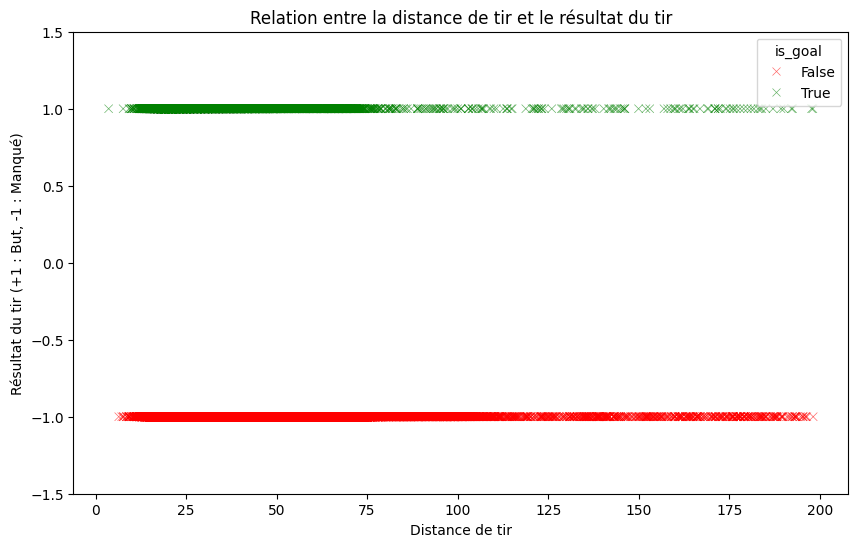

In [20]:
# Créer une nouvelle colonne pour les niveaux : +1 pour les buts, -1 pour les tirs manqués
df_2016['is_goal_level'] = df_2016['is_goal'].apply(lambda x: 1 if x else -1)

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2016, x='distance_de_tir', y='is_goal_level', hue='is_goal', 
                palette={True: 'green', False: 'red'}, alpha=0.6, marker='x')

# Ajouter des titres et des labels
plt.title("Relation entre la distance de tir et le résultat du tir")
plt.xlabel("Distance de tir")
plt.ylabel("Résultat du tir (+1 : But, -1 : Manqué)")

# Ajuster les limites de l'axe y
plt.ylim(-1.5, 1.5)

# Afficher le graphique
plt.show()

Ce graphe montre clairement que plus la distance de tir est faible, plus les chances de marquer augmentent. En effet, comme on peut l’observer, la majorité des buts sont inscrits à moins de 78 pieds du but adverse. Cependant, aucune distribution précise n’est visible sur ce graphe. On pourrait toutefois noter que la distribution des tirs manqués semble relativement uniforme, mais elle devient moins dense à mesure que la distance de tir augmente.

Nous allons donc tracer des histogrammes afin de voir si des scénarios plus significatifs apparaissent.

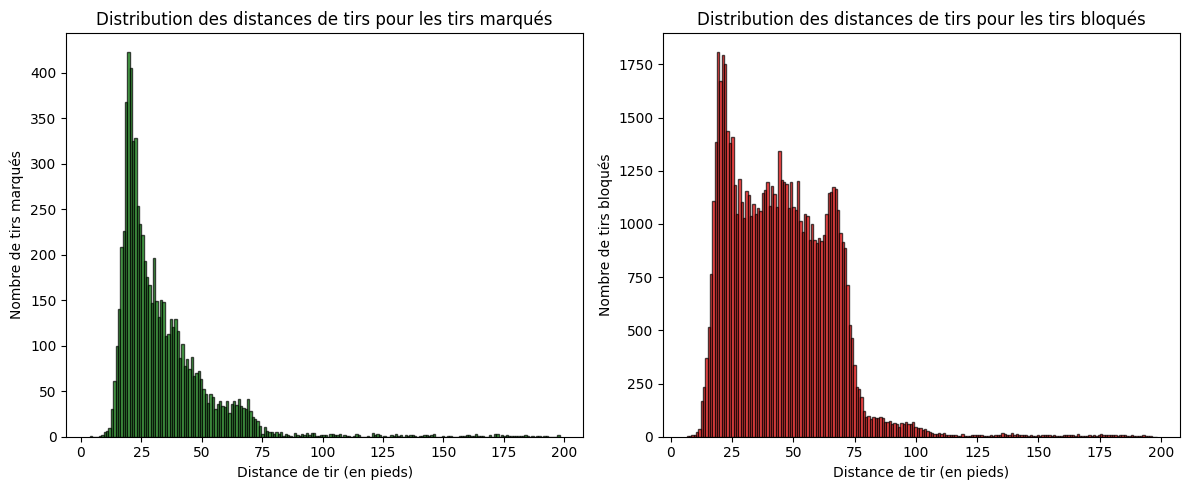

In [21]:
is_goal_df_2016 = df_2016.query("is_goal == True")
no_goal_df_2016 = df_2016.query("is_goal == False")

# Créer une figure avec deux sous-figures (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 ligne, 2 colonnes

# Premier histogramme dans la première sous-figure (axes[0])
axes[0].hist(is_goal_df_2016["distance_de_tir"], bins=200, color="green", alpha=0.7, edgecolor="black") # TODO: trouver une méthode pour déterminer la valeur de bins
axes[0].set_title("Distribution des distances de tir pour les tirs marqués")
axes[0].set_xlabel("Distance de tir (en pieds)")
axes[0].set_ylabel("Nombre de tirs marqués")

# Deuxième histogramme dans la deuxième sous-figure (axes[1])
axes[1].hist(no_goal_df_2016["distance_de_tir"], bins=200, color="red", alpha=0.7, edgecolor="black") # TODO: trouver une méthode pour déterminer la valeur de bins
axes[1].set_title("Distribution des distances de tir pour les tirs bloqués")
axes[1].set_xlabel("Distance de tir (en pieds)")
axes[1].set_ylabel("Nombre de tirs bloqués")

# Ajuster l'espacement entre les sous-figures
plt.tight_layout()

# Afficher la figure avec les deux sous-figures
plt.show()

Nous pouvons observer ici des distributions presque normales, mais étirées vers la gauche pour les tirs réussis et aplaties pour les tirs manqués. Nous allons passer à une échelle logarithmique afin de mieux visualiser et interpréter les données, qui semblent plutôt asymétriques ("skewed") selon le graphique. En effet, on constate que de nombreux tirs réalisés autour de 20 pieds se sont soldés par un but, ce qui rend le premier quartile de cette distribution très asymétrique.

**Échelle logarithmique**

In [34]:
def plot_shot_distance_histograms(df, season: int, log=False):
    # Filtrer les DataFrames pour les tirs marqués et non marqués
    is_goal_df = df.query("is_goal == True")
    no_goal_df = df.query("is_goal == False")

    # Créer une figure avec deux sous-figures (1 ligne, 2 colonnes)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 ligne, 2 colonnes

    if log:
        is_goal_distance_de_tir = is_goal_df["distance_de_tir"].apply(math.log)
        no_goal_distance_de_tir = no_goal_df["distance_de_tir"].apply(math.log)
    else:
        is_goal_distance_de_tir = is_goal_df["distance_de_tir"]
        no_goal_distance_de_tir = no_goal_df["distance_de_tir"]

    # Premier histogramme dans la première sous-figure (axes[0])
    axes[0].hist(is_goal_distance_de_tir, bins=200, color="green", alpha=0.7, edgecolor="black")
    axes[0].set_title(f"Distribution des distances de tir pour les tirs marqués en {season}")
    if log:
        axes[0].set_xlabel("Distance de tir (log en pieds)")
    else:
        axes[0].set_xlabel("Distance de tir (en pieds)")
    axes[0].set_ylabel("Nombre de tirs marqués")

    # Deuxième histogramme dans la deuxième sous-figure (axes[1])
    axes[1].hist(no_goal_distance_de_tir, bins=200, color="red", alpha=0.7, edgecolor="black")
    axes[1].set_title(f"Distribution des distances de tir pour les tirs bloqués en {season}")
    if log:
        axes[1].set_xlabel("Distance de tir (log en pieds)")
    else:
        axes[1].set_xlabel("Distance de tir (en pieds)")
    axes[1].set_ylabel("Nombre de tirs bloqués")

    # Ajuster l'espacement entre les sous-figures
    plt.tight_layout()

    # Afficher la figure avec les deux sous-figures
    plt.show()

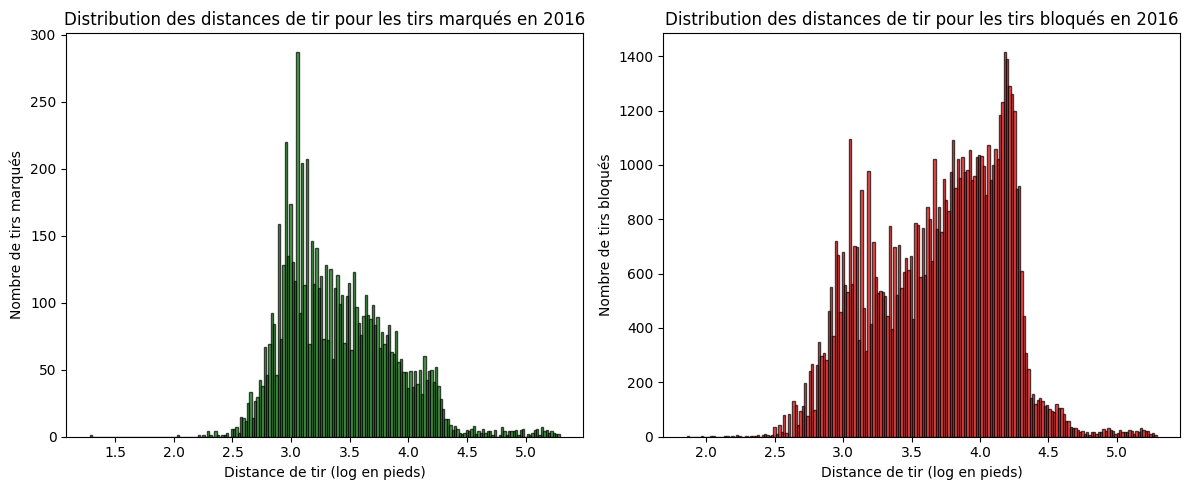

In [37]:
plot_shot_distance_histograms(df_2016, season=2016, log=True)

In [38]:
moyenne_des_tirs_marqués = is_goal_df_2016["distance_de_tir"].mean()
ecart_type_des_tirs_marqués = is_goal_df_2016["distance_de_tir"].std()
print(moyenne_des_tirs_marqués)
print(ecart_type_des_tirs_marqués)

33.96023403635806
20.736991631131836


Ici, nous pouvons observer que la distribution logarithmique des distances de tir est normale (avec un peu de bruit) dans les deux cas. En fait, il ne faut pas tirer trop près, ni trop loin, pour maximiser les chances de marquer des buts. D’après cette distribution presque normale avec les paramètres (33.9, 20.74), nous pouvons évaluer les probabilités qu’un tir aboutisse à un but. On peut rapidement constater qu’un tir effectué à environ exp(3.5) = 33.11 pieds serait fortement recommandé aux joueurs, et donc particulièrement dangereux pour le gardien adverse.

**Nous allons maintenant superposer les graphes des saisons 2018-2019 et 2020-2021 pour infirmer ou confirmer cette analyse précédente.**

In [30]:
df_2018 = get_dataframe_from_concatenated_csv_files(2018)
df_2018.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,y_coord,event_owner_team_id,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
0,0,2018020169,2018-10-30,1,00:16,7,shot-on-goal,False,backhand,27.0,38.0,6,Bruins,away,False,Equal Strength,5v5,1551,8477956,8474152
1,1,2018020169,2018-10-30,1,01:36,8,shot-on-goal,False,wrist,82.0,-10.0,6,Bruins,away,False,Penalty Kill,4v5,1541,8477956,8474152
2,2,2018020169,2018-10-30,1,01:49,10,shot-on-goal,False,wrist,-90.0,6.0,12,Hurricanes,home,False,Penalty Kill,4v5,1541,8476921,8470860


In [31]:
# Utilisation de la pipeline sur le DataFrame df_2018
df_2018 = data_processing_pipeline(df_2018)
df_2018.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id,home_team_defending_side,distance_de_tir
0,0,2018020169,2018-10-30,1,00:16,7,shot-on-goal,False,backhand,27.0,...,Bruins,away,False,Equal Strength,5v5,1551,8477956,8474152,right,82.298238
1,1,2018020169,2018-10-30,1,01:36,8,shot-on-goal,False,wrist,82.0,...,Bruins,away,False,Penalty Kill,4v5,1541,8477956,8474152,right,20.591260
2,2,2018020169,2018-10-30,1,01:49,10,shot-on-goal,False,wrist,-90.0,...,Hurricanes,home,False,Penalty Kill,4v5,1541,8476921,8470860,right,11.661904


In [32]:
df_2019 = get_dataframe_from_concatenated_csv_files(2019)
df_2019.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,y_coord,event_owner_team_id,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
0,0,2019020440,2019-12-05,1,01:52,53,goal,True,wrist,70.0,3.0,14,Lightning,home,False,Equal Strength,5v5,1551,Unknown,8471774
1,1,2019020440,2019-12-05,1,03:24,16,shot-on-goal,False,wrist,-76.0,-8.0,30,Wild,away,False,Equal Strength,5v5,1551,8476372,8476883
2,2,2019020440,2019-12-05,1,03:25,17,shot-on-goal,False,wrist,-76.0,-11.0,30,Wild,away,False,Equal Strength,5v5,1551,8476372,8476883


In [33]:
df_2019 = data_processing_pipeline(df_2019)
df_2019.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id,home_team_defending_side,distance_de_tir
0,0,2019020440,2019-12-05,1,01:52,53,goal,True,wrist,70.0,...,Lightning,home,False,Equal Strength,5v5,1551,Unknown,8471774,left,30.149627
1,1,2019020440,2019-12-05,1,03:24,16,shot-on-goal,False,wrist,-76.0,...,Wild,away,False,Equal Strength,5v5,1551,8476372,8476883,left,25.298221
2,2,2019020440,2019-12-05,1,03:25,17,shot-on-goal,False,wrist,-76.0,...,Wild,away,False,Equal Strength,5v5,1551,8476372,8476883,left,26.400758


In [39]:
df_2020 = get_dataframe_from_concatenated_csv_files(2020)
df_2020.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,y_coord,event_owner_team_id,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
0,0,2020020088,2021-01-24,1,00:25,53,shot-on-goal,False,slap,31,-34,28,Sharks,away,False,Equal Strength,5v5,1551,8478099,8478039
1,1,2020020088,2021-01-24,1,00:35,56,shot-on-goal,False,wrist,84,19,28,Sharks,away,False,Equal Strength,5v5,1551,8474053,8478039
2,2,2020020088,2021-01-24,1,01:34,57,shot-on-goal,False,snap,67,-17,28,Sharks,away,False,Equal Strength,5v5,1551,8478414,8478039


In [40]:
df_2020 = data_processing_pipeline(df_2020)
df_2020.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id,home_team_defending_side,distance_de_tir
0,0,2020020088,2021-01-24,1,00:25,53,shot-on-goal,False,slap,31,...,Sharks,away,False,Equal Strength,5v5,1551,8478099,8478039,right,76.922038
1,1,2020020088,2021-01-24,1,00:35,56,shot-on-goal,False,wrist,84,...,Sharks,away,False,Equal Strength,5v5,1551,8474053,8478039,right,24.839485
2,2,2020020088,2021-01-24,1,01:34,57,shot-on-goal,False,snap,67,...,Sharks,away,False,Equal Strength,5v5,1551,8478414,8478039,right,37.121422


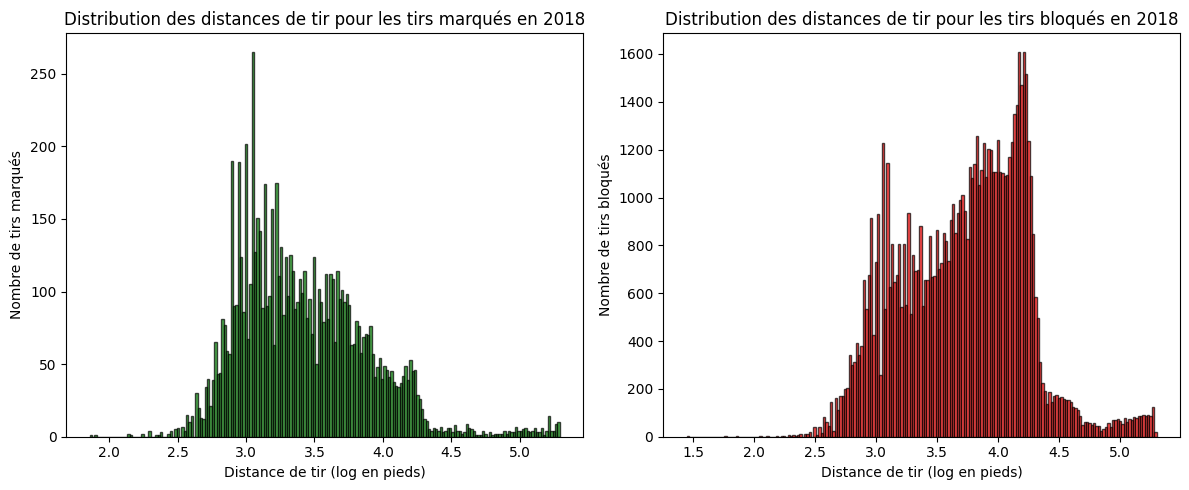

In [41]:
plot_shot_distance_histograms(df_2018, season=2018, log=True)

In [42]:
is_goal_df_2018 = df_2018.query("is_goal == True")
no_goal_df_2018 = df_2018.query("is_goal == False")
moyenne_des_tirs_marqués = is_goal_df_2018["distance_de_tir"].mean()
ecart_type_des_tirs_marqués = is_goal_df_2018["distance_de_tir"].std()
print(moyenne_des_tirs_marqués)
print(ecart_type_des_tirs_marqués)

34.76508255609192
22.51565432347087


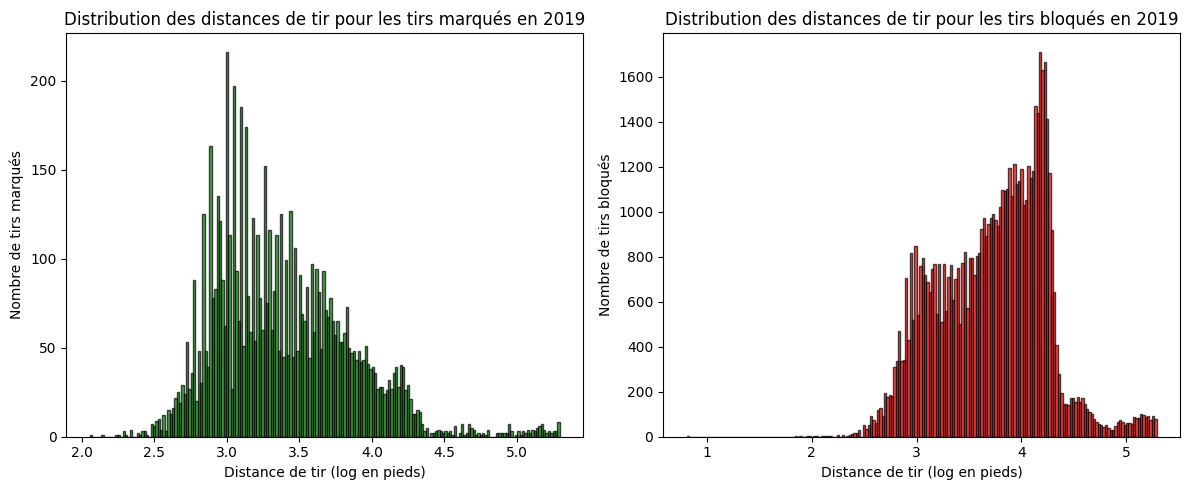

In [43]:
plot_shot_distance_histograms(df_2019, season=2019, log=True)

In [44]:
is_goal_df_2019 = df_2019.query("is_goal == True")
no_goal_df_2019 = df_2019.query("is_goal == False")
moyenne_des_tirs_marqués = is_goal_df_2019["distance_de_tir"].mean()
ecart_type_des_tirs_marqués = is_goal_df_2019["distance_de_tir"].std()
print(moyenne_des_tirs_marqués)
print(ecart_type_des_tirs_marqués)

33.688239866032255
21.482915382771008


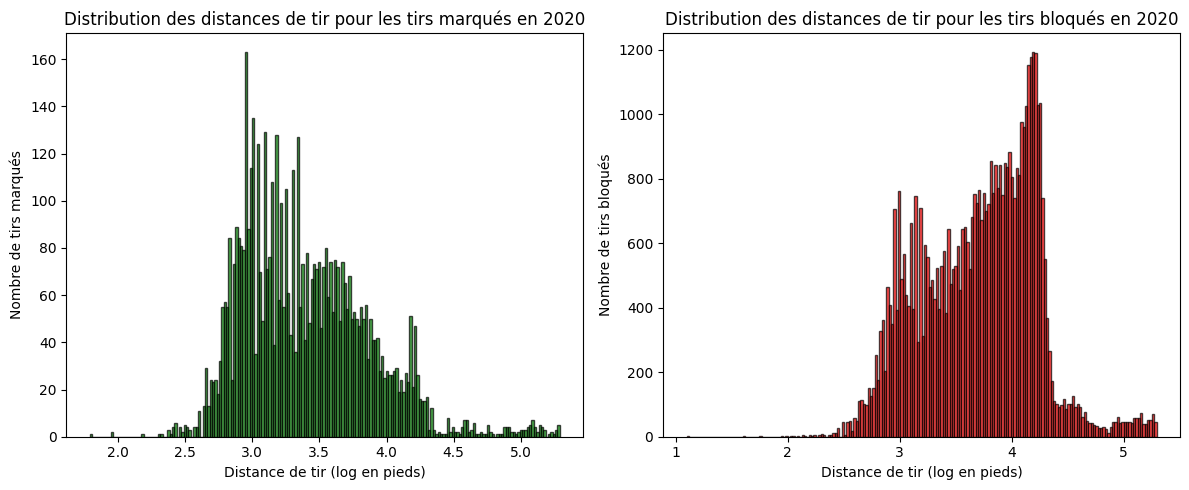

In [45]:
plot_shot_distance_histograms(df_2020, season=2020, log=True)

In [46]:
is_goal_df_2020 = df_2020.query("is_goal == True")
no_goal_df_2020 = df_2020.query("is_goal == False")
moyenne_des_tirs_marqués = is_goal_df_2020["distance_de_tir"].mean()
ecart_type_des_tirs_marqués = is_goal_df_2020["distance_de_tir"].std()
print(moyenne_des_tirs_marqués)
print(ecart_type_des_tirs_marqués)

34.011324932961294
21.660426909974


**Analyse et commentaires sur l'évolution au cours des trois saisons étudiées**

Comme on peut le constater, les histogrammes en échelle logarithmique des distances de tirs réussis et manqués ne semblent pas présenter des distributions très différentes. À première vue, on observe que les distributions des distances de tirs réussis semblent suivre des lois normales avec des moyennes assez proches et des variances apparemment similaires. Pour confirmer cette hypothèse, nous pourrions commencer par effectuer un test de normalité sur l'une de ces distributions. Si elle s'avère normale, nous procéderons à des tests pour vérifier si les moyennes des distributions sont significativement différentes ou non. Ainsi, nous pourrons déterminer si ces données appartiennent à la même distribution, et dans ce cas, nous conclurons qu'il n'y a pas eu d'évolution significative au cours de ces trois dernières saisons.

<h3>Question 2.)</h3>

**Nous avons choisi les données de la saison 2017.**

In [47]:
df_2017 = get_dataframe_from_concatenated_csv_files(2017)
df_2017.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,y_coord,event_owner_team_id,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
0,0,2017020430,2017-12-07,1,00:15,53,goal,True,wrist,70.0,17.0,6,Bruins,home,False,Equal Strength,5v5,1551,Unknown,8475809
1,1,2017020430,2017-12-07,1,03:03,62,shot-on-goal,False,wrist,-84.0,-5.0,53,Coyotes,away,False,Equal Strength,5v5,1551,8476921,8471695
2,2,2017020430,2017-12-07,1,05:15,69,shot-on-goal,False,wrist,75.0,-2.0,6,Bruins,home,False,Equal Strength,5v5,1551,8477956,8475809


In [48]:
df_2017 = data_processing_pipeline(df_2017)
df_2017.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id,home_team_defending_side,distance_de_tir
0,0,2017020430,2017-12-07,1,00:15,53,goal,True,wrist,70.0,...,Bruins,home,False,Equal Strength,5v5,1551,Unknown,8475809,left,34.481879
1,1,2017020430,2017-12-07,1,03:03,62,shot-on-goal,False,wrist,-84.0,...,Coyotes,away,False,Equal Strength,5v5,1551,8476921,8471695,left,16.763055
2,2,2017020430,2017-12-07,1,05:15,69,shot-on-goal,False,wrist,75.0,...,Bruins,home,False,Equal Strength,5v5,1551,8477956,8475809,left,25.079872


/tmp/ipykernel_16270/2737977168.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grouped_2017 = df_2017.groupby(['distance_bins', 'shot_type']).agg(


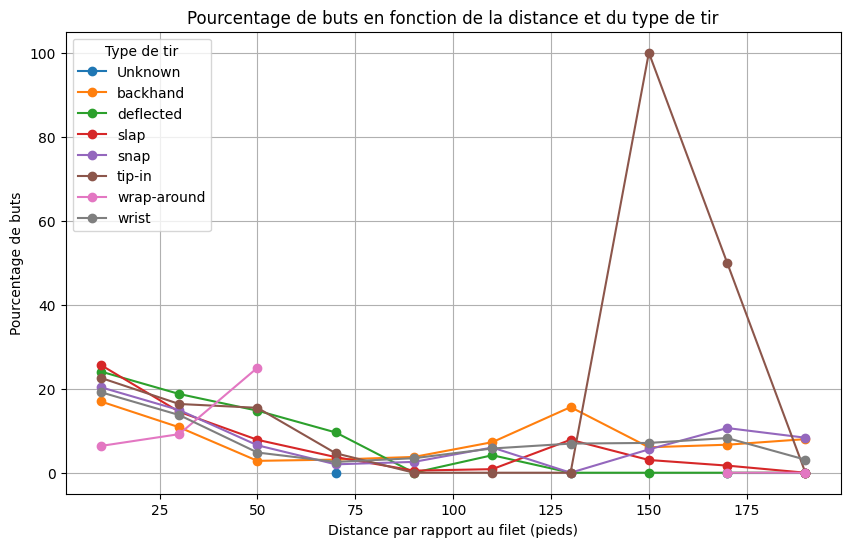

In [49]:
# Ajoutons une colonne de "distance_bins" pour classer les distances par intervalles (ici tous les 20 pieds)
df_2017['distance_bins'] = pd.cut(df_2017['distance_de_tir'], bins=np.arange(0, df_2017['distance_de_tir'].max() + 5, 20))

# Regroupons les données par distance et type de tirs, puis calculons les totaux et pourcentages de buts
data_grouped_2017 = df_2017.groupby(['distance_bins', 'shot_type']).agg(
    total_shots=('event_type', 'count'),
    total_goals=('is_goal', 'sum')
).reset_index()
data_grouped_2017['goal_percentage'] = (data_grouped_2017['total_goals'] / data_grouped_2017['total_shots']) * 100

# Traçons le graphique
plt.figure(figsize=(10, 6))
for shot_type in data_grouped_2017['shot_type'].unique():
    subset = data_grouped_2017[data_grouped_2017['shot_type'] == shot_type]
    plt.plot(subset['distance_bins'].apply(lambda x: x.mid), subset['goal_percentage'], marker='o', label=shot_type)

plt.xlabel('Distance par rapport au filet (pieds)')
plt.ylabel('Pourcentage de buts')
plt.title("Pourcentage de buts en fonction de la distance et du type de tir")
plt.legend(title='Type de tir')
plt.grid(True)
plt.show()

<h1>Interprétations, commentaires et conclusion</h1>

Comme on peut le voir, ce graphique est très parlant, car il montre le succès de chaque type de tir en fonction de la distance au filet. En effet, jusqu'à moins de 75 pieds, le tir qui conserve le meilleur succès est le tir dévié (deflected). Ensuite, entre 80 et 130 pieds, le tir en backhand présente un meilleur pourcentage de succès. Enfin, au-delà de 130 pieds, le Tip-in est incroyablement concluant, car il semble réussir à tous les coups, ce qui suscite des doutes quant à la pertinence de ce résultat. Ne serait-ce pas parce qu'il y a très peu de tirs de type Tip-in, qui ont pourtant presque tous abouti à un but par hasard, que nous obtenons ce résultat ? Et s'il y avait beaucoup plus de tirs de ce type, n'est-il pas possible que le pourcentage de réussite soit revu à la baisse ? Ne s'agirait-il pas d'un biais dû au manque de données ? Nous pourrions commencer une analyse simple en comparant le pourcentage de tirs de ce type avec celui des autres types de tirs.